## Normalization

In [1]:
import cv2
import numpy as np

img = cv2.imread('New_Zealand_Boat.jpg', 0)  # Grayscale

# Normalize pixel values to range 0-1
norm_0_1 = cv2.normalize(img, None, 0, 1, cv2.NORM_MINMAX, dtype=cv2.CV_32F)

In [7]:
norm_0_255 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

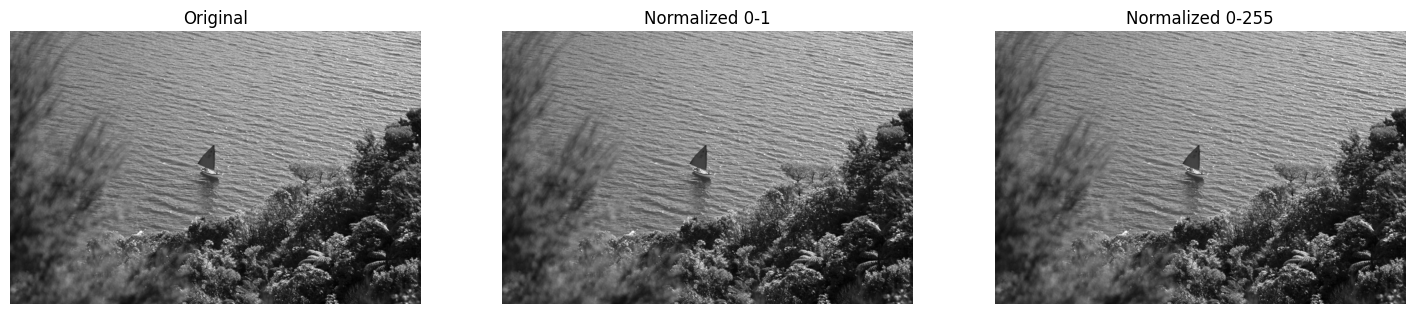

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(132); plt.imshow(norm_0_1, cmap='gray'); plt.title('Normalized 0-1'); plt.axis('off')
plt.subplot(133); plt.imshow(norm_0_255, cmap='gray'); plt.title('Normalized 0-255'); plt.axis('off')
plt.show()

## Blurring / Smoothing

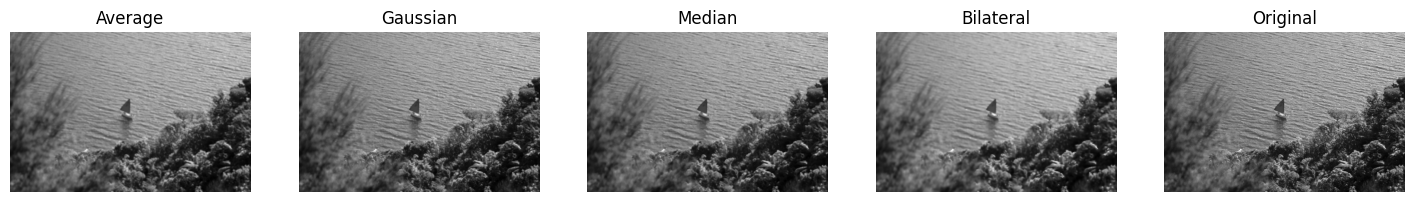

In [11]:
blur = cv2.blur(img, (5,5))
gauss = cv2.GaussianBlur(img, (5,5), 0)
median = cv2.medianBlur(img, 5)
bilateral = cv2.bilateralFilter(img, 9, 75, 75)


plt.figure(figsize=[18,5])
plt.subplot(151); plt.imshow(blur, cmap='gray'); plt.title('Average'); plt.axis('off')
plt.subplot(152); plt.imshow(gauss, cmap='gray'); plt.title('Gaussian'); plt.axis('off')
plt.subplot(153); plt.imshow(median, cmap='gray'); plt.title('Median'); plt.axis('off')
plt.subplot(154); plt.imshow(bilateral, cmap='gray'); plt.title('Bilateral'); plt.axis('off')
plt.subplot(155); plt.imshow(img, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.show()

## Morphological Operations

### Erosion

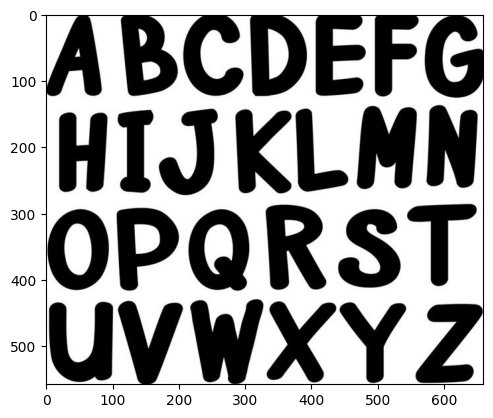

In [21]:
import cv2, numpy as np, matplotlib.pyplot as plt
img = cv2.imread(r"letters.jpg", 0) # Load grayscale image
bin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]  # Binarize
plt.imshow(img, cmap='gray')

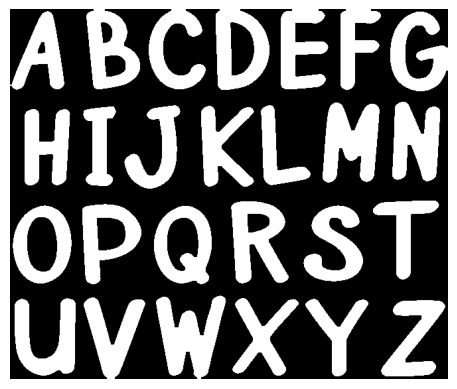

(<matplotlib.image.AxesImage at 0x24a569fbc50>,
 (np.float64(-0.5), np.float64(659.5), np.float64(557.5), np.float64(-0.5)),
 None)

In [22]:
k = np.ones((5, 5), np.uint8)  # Define 5x5 kernel
inv = cv2.bitwise_not(bin)                                 
out = cv2.erode(inv, k, 1)              
plt.imshow(out, cmap='gray'), plt.axis('off'), plt.show()

### Dilation

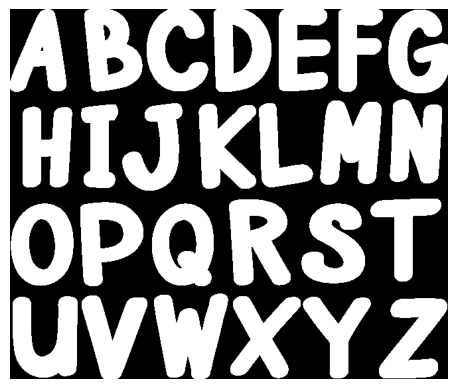

(<matplotlib.image.AxesImage at 0x24a56b7f110>,
 (np.float64(-0.5), np.float64(659.5), np.float64(557.5), np.float64(-0.5)),
 None)

In [23]:
bin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]  # Binarize

k = np.ones((3, 3), np.uint8) # Define 3x3 kernel
inv = cv2.bitwise_not(bin)        
out = cv2.dilate(inv, k, 1)      
plt.imshow(out, cmap='gray'), plt.axis('off'), plt.show()

### Opening

In [27]:
import cv2, numpy as np, matplotlib.pyplot as plt

img = cv2.imread(r"car_noise.png", 0)  # Load grayscale
bin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]  # Binarize

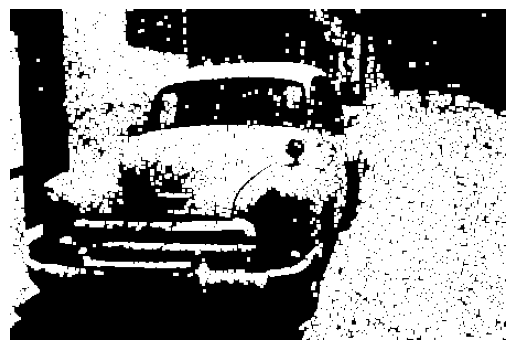

(<matplotlib.image.AxesImage at 0x24a567a9a90>,
 (np.float64(-0.5), np.float64(449.5), np.float64(299.5), np.float64(-0.5)),
 None)

In [28]:
k = np.ones((3, 3), np.uint8)  # 3x3 kernel
opened = cv2.morphologyEx(bin, cv2.MORPH_OPEN, k)
plt.imshow(opened, cmap='gray'), plt.axis('off'), plt.show()

### Closing

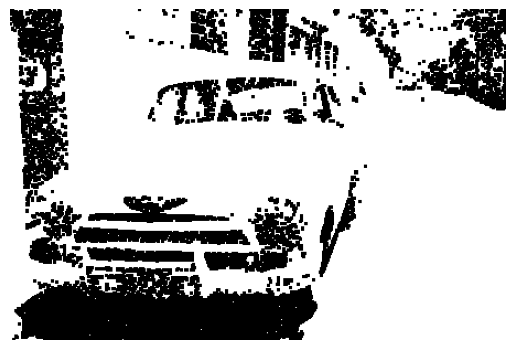

(<matplotlib.image.AxesImage at 0x24a56c78f50>,
 (np.float64(-0.5), np.float64(449.5), np.float64(299.5), np.float64(-0.5)),
 None)

In [29]:
k = np.ones((3, 3), np.uint8)
closed = cv2.morphologyEx(bin, cv2.MORPH_CLOSE, k)  # Apply closing
plt.imshow(closed, cmap='gray'), plt.axis('off'), plt.show()

### Morphological Gradient

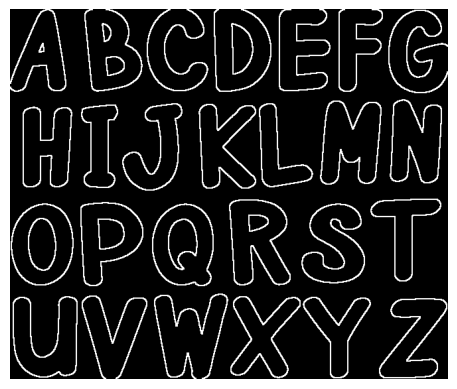

(<matplotlib.image.AxesImage at 0x24a56c9b890>,
 (np.float64(-0.5), np.float64(659.5), np.float64(557.5), np.float64(-0.5)),
 None)

In [31]:
import cv2, numpy as np, matplotlib.pyplot as plt
img = cv2.imread(r"letters.jpg", 0)  # Load grayscale image
bin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]  # Binarize

k = np.ones((3, 3), np.uint8)  # Define 3x3 kernel
inv = cv2.bitwise_not(bin)  
out = cv2.morphologyEx(inv, cv2.MORPH_GRADIENT, k) 
plt.imshow(out, cmap='gray'), plt.axis('off'), plt.show()

### Top Hat

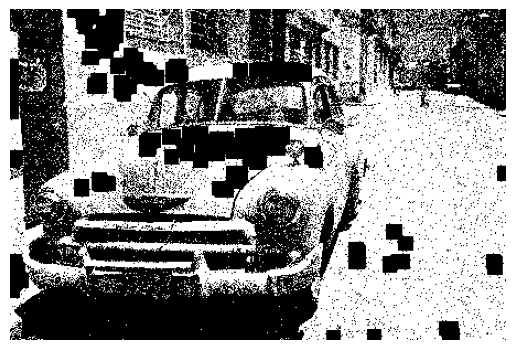

(<matplotlib.image.AxesImage at 0x24a56ccafd0>,
 (np.float64(-0.5), np.float64(449.5), np.float64(299.5), np.float64(-0.5)),
 None)

In [32]:
import cv2, numpy as np, matplotlib.pyplot as plt
img = cv2.imread("car_noise.png", 0)

bin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
k = np.ones((13, 13), np.uint8)
top = cv2.morphologyEx(bin, cv2.MORPH_TOPHAT, k)
plt.imshow(top, cmap='gray'), plt.axis('off'), plt.show()

### Black Hat

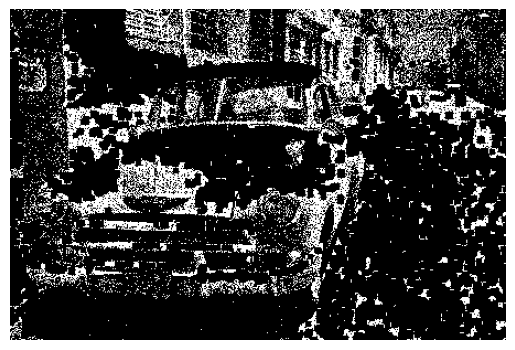

(<matplotlib.image.AxesImage at 0x24a56ce65d0>,
 (np.float64(-0.5), np.float64(449.5), np.float64(299.5), np.float64(-0.5)),
 None)

In [33]:
bin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
inv = cv2.bitwise_not(bin)
k = np.ones((5, 5), np.uint8)
bh = cv2.morphologyEx(inv, cv2.MORPH_BLACKHAT, k)
plt.imshow(bh, cmap='gray'), plt.axis('off'), plt.show()

## Edge Detection

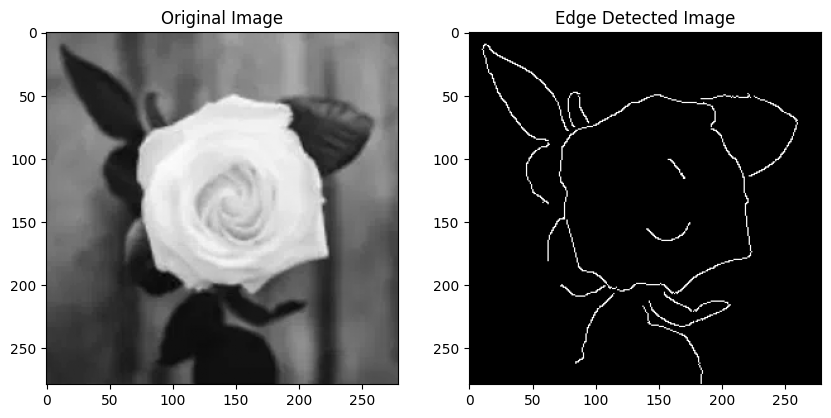

In [39]:
image = cv2.imread('edge_flower.png', cv2.IMREAD_GRAYSCALE)

# applying gaussian blur
blurred_image = cv2.GaussianBlur(image, (5,5), 1.4)

#apply canny edge detector
edges = cv2.Canny(blurred_image, 50, 150)

plt.figure(figsize=(10,5))
plt.subplot(121);plt.title('Original Image');plt.imshow(image, cmap='gray')
plt.subplot(122);plt.title('Edge Detected Image');plt.imshow(edges, cmap='gray')